<a href="https://colab.research.google.com/github/Atlus501/PyTorch/blob/main/First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my first file that will document my pytorch journey

The source is www.learnpytorch.io/00_pytorch_fundamentals/

use machine learning in situations with long lists of rules, continually changing environments.

PyTorch is the most popular research deep learning framework in python. There are many pre-built deep learning models.

Whole stack: preprocess data, model data, deploy model in your application/cloud.

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.6.0+cu124


#Introduction to Tensors

Main building block of DL and data.

Ways to represent multidimensional numeric data

Scalars and vectors are lowercased. Matrices and tensors are uppercased.

In [ ]:
#scalar
#it has no dimensions, it is just a single number

scalar = torch.tensor(7)
scalar

scalar.ndim
scalar.item()

7

In [ ]:
#vector
#it has 1 dimension. It has a magnitude and direction
#think of number of dimensions as the number of pairs of square brackets

vector = torch.tensor([7,7])
vector.shape

torch.Size([2])

In [ ]:
#matrix
MATRIX = torch.tensor([[7, 8], [1, 2]])
MATRIX.ndim

2

In [ ]:
#TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]],
                         [[3, 4, 6], [6, 7, 9], [1, 90, 2]]])
TENSOR.shape

torch.Size([2, 3, 3])

#Random Tensors

Important because many neural networks start with random numbers and then adjust those to better represent the data when failure arrives.

In [ ]:
random_tensor = torch.rand(3,4)

random_tensor = torch.zeros(3,4)
random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
#Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(224, 224, 3)) #height, width, color channels

random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

#Creating a range of tensors and tensors-like

In [ ]:
test = torch.arange(1, 21, 2)

#creating tensors like
# a tensor like is a tensor that has the same shape as another tensor
ten_zeros = torch.ones_like(input=test)
ten_zeros

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#Tensor DataTypes

Most common erros are:
1.  Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right device

In [ ]:
#creates a tensor of float 32s
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=int #datatype of tensor
                               , device='cuda' #the hardware that the tensor lives on
                               , requires_grad=False) # tracking tensor gradient after specific operations?
float_32_tensor.dtype

torch.int64

In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor.device

device(type='cpu')

#Tensor Operations

They include
* the primary 4 operations
* matrix multiplication

In [ ]:
test = torch.tensor([1, 2, 3])
test + 10

tensor([11, 12, 13])

In [ ]:
test * 10

tensor([10, 20, 30])

#Matrix Multiplcation



In [ ]:
#syntax for matrix multiplication
torch.matmul(test, test)

tensor(14)

#Matrix Aggregation

This includes

In [ ]:
test = torch.rand(8)
test

tensor([0.1256, 0.6574, 0.2906, 0.0177, 0.7735, 0.5678, 0.2920, 0.6182])



*   List item
*   List item



In [ ]:
test.mean()

tensor(0.4178)

In [ ]:
torch.mean(test.type(torch.float32))

tensor(0.4178)

In [ ]:
test.argmin()

tensor(3)

#Rehsaping, viewing and stacking

In [ ]:
#reshaping a tensor
#the new shape of the tensor must be compatible with the number of elements
test = torch.arange(2, 10)
test.reshape(2, 4)
test

tensor([2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
#a view share the original memory of the original tensor
#i.e., it is a shallow copy where any changes to this tensor is reflected in the original
newView = test.view(8)
newView[1:4:2] = -3
newView

tensor([  2,  -3, -11,  -3, -11,   7,   8,   9])

In [ ]:
#takes a bunch of tensors and stacks them on the axis that you indicate
#e.g., dim = 0 stackes them vertically while dim = 1 stacks them horizontally
#there are also hstack and vstack
stack = torch.stack([test, test, test], dim=0)
stack = torch.unsqueeze(stack, dim = 0)

tensor([[  2,  -3, -11,  -3, -11,   7,   8,   9],
        [  2,  -3, -11,  -3, -11,   7,   8,   9],
        [  2,  -3, -11,  -3, -11,   7,   8,   9]])

#Squeeze, unsqueeze, and permuting

In [ ]:
#there is also squeeze and unsqueeze
#squeeze() removes all single dimesions from a target
stack_sq = stack.squeeze()
stack_sq.squeeze()

#unsqueeze adds a 1 dimension to a target tensor
stack_sq.unsqueeze(dim=2)
stack_sq

tensor([[  2,  -3, -11,  -3, -11,   7,   8,   9],
        [  2,  -3, -11,  -3, -11,   7,   8,   9],
        [  2,  -3, -11,  -3, -11,   7,   8,   9]])

In [ ]:
#torch.permute() basically, it switches the dimensions of the tensor
stack_sq.permute(1, 0)
stack_sq = stack_sq[0: 1][:]
stack_sq

tensor([[  2,  -3, -11,  -3, -11,   7,   8,   9]])

#NumPy
NumPy is a popular scientific Python numerical computing library. And because of this, PyTorch has functionality to interact with it. Data in NumPy,

In [ ]:
#changing data from numpy array into tensor
#changing the values from the tensor doesn't change anything in the array
random = np.random.random(5)
stack_sq = torch.from_numpy(random)
stack_sq.type(torch.float32)

tensor([0.7215, 0.7761, 0.2911, 0.5751, 0.4784])

In [ ]:
stack_sq.numpy()

dtype('float64')

#Reproducability

Trying to thake the random out of random. I.e., how a neurnetwork learns before the neuro-network updates random numbers to make better representations of the data.

Reducing the randomness in neural networks comes the concept of a random seed. It essentially flavors the randomness of the machine.

In [ ]:
#this method sets the random seed of a machine
torch.manual_seed(42)
test = torch.rand(3, 4)
test

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

In [ ]:
#This is a method that sets the device of the tesnor to the cpu
test.cpu()

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

#Creating a dataset with linear regression

Let's use a simple regression model to predict data using known parameters.

In [ ]:
weight = 0.7 #this is the slope of the linear regression model
bias = 0.7 #this is the x=intercept of the linear regression model

#create
start = 0
end = 1
step = 1.0/20.0
X = torch.arange(start, end, step).unsqueeze(dim=1) #input
y = weight * X + bias #output


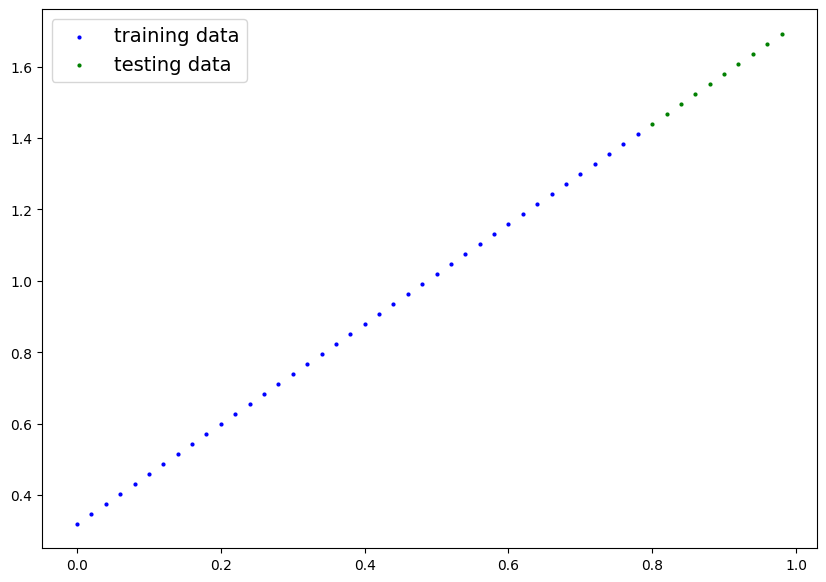

In [ ]:
#now you need to split the data into training and validation sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_prediction(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='predictions')

  plt.legend(prop={'size':14})
  plt.show()

plot_prediction()

#Build Model

Algorithms that it uses to correct the data is gradient descent and back propagation.

Essental models are torch.nn (contains all of the building blocks for comptuational graphs).

torch.nn.Module: the base class for all neural network modeules, all the bulding blocks for neual networks are subclasses. It requires a forward() method to be implemented

torch.optim: contains various optimization algorithms (these tall the model parameters sotred in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss)

torch.utils.data.Dataset: represents a map between key (label) and sample (features) pairs of your data. Such as images and thei associated labels.

torch.utils.data.DataLoader: creates a python iterable over a torch Dataset (allows you to iterate over your data)

In [ ]:
import torch.nn as nn

#nn.Module is the base class for all neural network modules
#all models should be subclasses of this class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    #parameters are torch.Tensor subclasses when used with Modules because they are automatically
    #added to the list of parameters
    #requires_grad is stating if this parameter can be udpated via gradient descent
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    #Foward method to define the computationa in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #this is the linear regression formula

torch.manual_seed(42)

model_0 = LinearRegressionModel()

In [ ]:
#context manager
#what we use when we are making predictions
def test(model):
  with torch.inference_mode():
    y_preds = model(X_test)
    plot_prediction(predictions = y_preds)


Loss function: a function to measure how wrong your model's prections are to the ideal outputs, lower is better

Optimizer: Takes into account the loss of a model and adjusts the model's parameters (e.g., wiehgt & bias in the los unction). SGD is the most popular one.

For PyTorch we need a training and testing loop.

In [ ]:
#sets up a loss funciton
loss_fn = nn.L1Loss()

#sets up an optimiser
#learning rate is the most important hyperparameter you can set
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)


#Building a training/testing loop in PyTorch

A training loop
0. Loops through the data
1. Forward pass (this involves data moving through our model's forward() functions) to make predictions on data - forward propagation
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradiens of each of the parameters of our model with respect to the loss (backpropagation)
5. Optimizer step - use the optimizer to adjust our model's parametes to try and improve the loss  (gradient descent)

In [ ]:
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

#0 Loop through the data
for epoch in range(epochs):
  model_0.train()

  #1. Foward pass
  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  #Testing
  model_0.eval()


#Saving/loading a model

1. torch.save() - allows you to save a PyTorch object in Python's pickle format
2. torch.load() - allows you to load a saved PyTorch object
3. torch.nn.Module.load_state_dic() - this allows you to load a model's saved state dictionary

a state dict is a python dictionary object that maps each layer to its parameter tensor.

In [ ]:
from pathlib import Path

#1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) #if it already exists, it won't
#raise an error

#2. Create model save path
MODEL_NAME = '01_pytorch_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

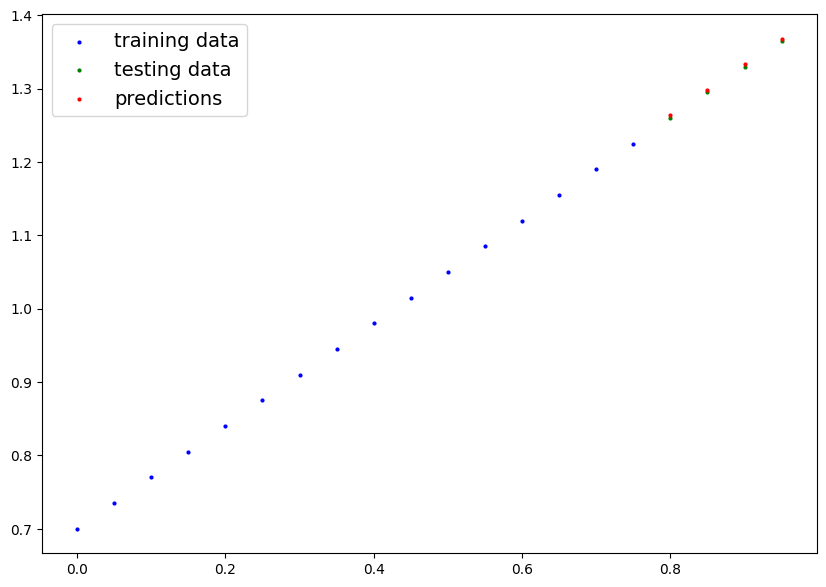

In [ ]:
test(loaded_model_0)

In [ ]:
from torch import nn

#setting the device of this
device = "cuda" if torch.cuda.is_available() else "cpu"

weight = 1.4
bias = .32

#create range values
start = 0
end = 1
step = 0.02

#create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

#split the data into training sets
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

#building a model or picking one that fits
class newModel(nn.Module):
  #initializing the new model
  def __init__(self):
    super().__init__()
    #generally initalize layers intentionally
    self.linear_layer = nn.Linear(in_features = 1, out_features=1)

  #overwritting the forward method
  def forward(self, x):
    return self.linear_layer(x)

torch.manual_seed(81)

model_1 = newModel()

loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
epochs = 100

#training loop for the AI
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

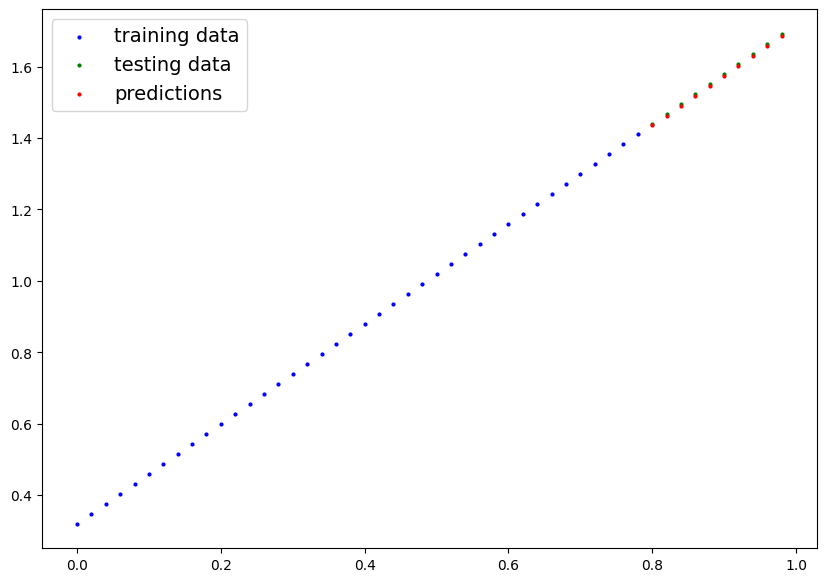

In [ ]:
test(model_1)

In [ ]:
from pathlib import Path

#1. create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True) #if it already exists, it won't
#raise an error

#2. Create model save path
MODEL_NAME = '01_pytorch_workflow.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

Saving model to: models/01_pytorch_workflow.pth


<All keys matched successfully>